In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid

In [3]:
iris = load_iris()
X = iris.data[:100]
y = iris.target[:100].reshape(-1, 1) 

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
np.random.seed(42)
n_features = X_scaled.shape[1]

In [9]:
weights = np.random.randn(n_features, 1)
bias = np.random.randn(1)

In [11]:
def sigmoid_np(x):
    return 1 / (1 + np.exp(-x))
manual_logits = np.dot(X_scaled, weights) + bias
manual_preds = sigmoid_np(manual_logits)

In [13]:
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(n_features,))
])
model.set_weights([weights, bias])
keras_preds = model.predict(X_scaled).flatten()

C:\Users\indum\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


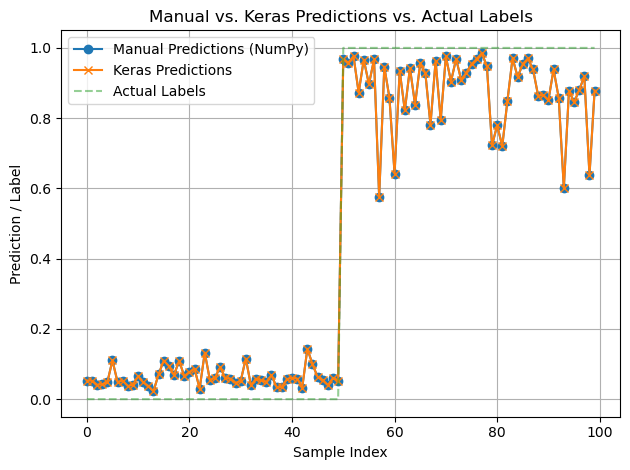

In [15]:
plt.plot(manual_preds, label='Manual Predictions (NumPy)', marker='o')
plt.plot(keras_preds, label='Keras Predictions', marker='x')
plt.plot(y.flatten(), label='Actual Labels', linestyle='--', alpha=0.5)
plt.title('Manual vs. Keras Predictions vs. Actual Labels')
plt.xlabel('Sample Index')
plt.ylabel('Prediction / Label')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()